In [121]:
# Put all the imports here
import folium
import numpy as np
import pandas as pd
import plotly as ply
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import seaborn as sns

from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt

# Make plotly work in offline mode
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
h1b_frame = pd.read_csv('./data/h1b.csv') # dataset to large, please download from README.md

In [4]:
h1b_frame_with_states = pd.read_csv("./data/h1b_with_states.csv")

In [5]:
cap_exampt_employee_list = pd.read_csv("./data/cap-exampt-employee-list.csv", encoding="ISO-8859-1")
cap_exampt_employee_list = list(cap_exampt_employee_list['employeer'])
cap_exampt_employee_list.append('university')
cap_exampt_employee_list.append('college')

In [117]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
cap_exempt_counts = []

for y in years: 
    h1b_frame_group = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['state'] != 'Na']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['YEAR'] == y ]
    h1b_frame_group_exempt = h1b_frame_group.loc[ h1b_frame_group['EMPLOYER_NAME'].str.contains('|'.join(cap_exampt_employee_list), case=False, na=False, regex=True) ]
    cap_exempt = h1b_frame_group_exempt.count()['Unnamed: 0']
    cap_exempt_counts.append(cap_exempt)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [122]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
total_counts = []

for y in years: 
    h1b_frame_group = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['state'] != 'Na']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['YEAR'] == y ]
    total_count = h1b_frame_group.count()['Unnamed: 0']
    total_counts.append(total_count)

In [6]:
# copying result so it is easier to use later
years = [2011, 2012, 2013, 2014, 2015, 2016]
cap_exempt_counts = [25475, 24167, 23244, 23873, 24683, 24589]
total_counts = [307581, 352169, 382590, 454738, 546705, 569180]
non_cap_exempt = [282106, 328002, 359346, 430865, 522022, 544591]

In [7]:
labels = ['Cap Exempt', 'Cap Non-exempt']

for i in range(0, len(cap_exempt_counts)):
    layout = {
        "title" : ("Cap Exempt vs Cap Non-Exempt in %s" % years[i]),
    }
    
    data = {
        "values":[cap_exempt_counts[i], non_cap_exempt[i]],
        "labels":labels,
        "name": years[i],
        "type": "pie",
    }

    fig = go.Figure(
        data=[data], 
        layout=layout
    )
    
    iplot(fig, filename='donut')

In [ ]:
# Potentially want to apply for H1B? What are the companies with top salaries, most H1B applications, etc in Bay Area

In [269]:
h1b_frame_cali = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['state'] == 'California']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['YEAR'] == 2016]

categories = ['computer']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['SOC_NAME'].str.
                                    contains('|'.join(categories), case=False, na=False, regex=True) ]

lat = [36.5, 41.5] # San francisco, Okland, WC etc
lon = [-123.0, -120.0] # from Santa Rosa to Gillroy

h1b_frame_cali = h1b_frame_cali.loc[ 
    (h1b_frame_cali['lat'].between(lat[0], lat[1], inclusive=True)) &
    (h1b_frame_cali['lon'].between(lon[0], lon[1], inclusive=True))
]

In [272]:
h1b_frame_cali = h1b_frame_cali.groupby('EMPLOYER_NAME').count().sort_values('Unnamed: 0', ascending=False)

In [273]:
more_1000 = h1b_frame_cali.loc[h1b_frame_cali['Unnamed: 0'] > 1000].index.values
between_100_and_1000 = h1b_frame_cali.loc[h1b_frame_cali['Unnamed: 0'].between(100, 999, inclusive=True)].index.values

In [274]:
more_1000

array(['INFOSYS LIMITED', 'WIPRO LIMITED'], dtype=object)

In [275]:
between_100_and_1000

array(['HCL AMERICA, INC.', 'TATA CONSULTANCY SERVICES LIMITED',
       'TECH MAHINDRA (AMERICAS),INC.', 'ACCENTURE LLP',
       'IBM INDIA PRIVATE LIMITED', 'INTEL CORPORATION', 'APPLE INC.',
       'GOOGLE INC.', 'EXILANT TECHNOLOGIES PRIVATE LIMITED',
       'PERSISTENT SYSTEMS, INC.', 'SRS CONSULTING INC.', 'FACEBOOK, INC.',
       'DELOITTE CONSULTING LLP', 'MARVELL SEMICONDUCTOR, INC.',
       'ETOUCH SYSTEMS CORPORATION', 'TRINGAPPS INC',
       'CAPGEMINI AMERICA INC', 'TECH MAHINDRA (AMERICAS), INC.',
       'COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION',
       'CISCO SYSTEMS, INC.', 'IBM CORPORATION',
       'TAVANT TECHNOLOGIES, INC.', 'VENTURESOFT GLOBAL INC',
       'CRITICALRIVER, INC.', 'SNW INFOTECH INC', 'YAHOO! INC.',
       'GSPANN TECHNOLOGIES, INC.', 'DGN TECHNOLOGIES INC',
       'ALPHA NET CONSULTING LLC'], dtype=object)

In [276]:
between_99_and_50 = h1b_frame_cali.loc[h1b_frame_cali['Unnamed: 0'].between(50, 99, inclusive=True)].index.values

In [277]:
between_99_and_50

array(['ERNST & YOUNG U.S. LLP', 'TEXARA SOLUTIONS LLC',
       'NVIDIA CORPORATION', 'LINKEDIN CORPORATION',
       'ESTRADA CONSULTING INC', 'ALTERA CORPORATION',
       'TECH MAHINDRA (AMERICAS) INC.', 'ARICENT N.A. INC.',
       'NTT DATA, INC.', 'GLOBALLOGIC,INC.', 'ORACLE AMERICA, INC.',
       'AUTODESK, INC.', 'ARICENT N.A.',
       'LARSEN & TOUBRO INFOTECH LIMITED', 'NISUM TECHNOLOGIES INC.',
       'ITECH ANALYST CORP', 'EVEREST CONSULTING GROUP, INC.,',
       'IPOLARITY LLC', 'VINGS TECHNOLOGIES LIMITED', 'SMARTPLAY, INC.',
       'XORIANT CORPORATION', 'CADENCE DESIGN SYSTEMS, INC.',
       'ZENSAR TECHNOLOGIES INC.',
       'PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC', 'BRILLIO, LLC',
       'SALESFORCE.COM INC.', 'HEWLETT PACKARD ENTERPRISE COMPANY',
       'SYMANTEC CORPORATION', 'VMWARE, INC.', 'EMC CORPORATION',
       'INTUIT INC.', 'QUALCOMM TECHNOLOGIES, INC.', 'SANDISK CORPORATION',
       'SPARTA CONSULTING INC.', 'MPHASIS CORPORATION',
       'COMPUNNEL SOFTW

In [278]:
between_20_and_49 = h1b_frame_cali.loc[h1b_frame_cali['Unnamed: 0'].between(20, 49, inclusive=True)].index.values

In [279]:
between_20_and_49

array(['ASTIR IT SOLUTIONS INC.', 'ADVANCED MICRO DEVICES, INC.',
       'SAAMA TECHNOLOGIES, INC.', 'MICRON TECHNOLOGY, INC.',
       'MINDTREE LIMITED', 'APTTUS CORPORATION', 'MICROSOFT CORPORATION',
       'CELER SYSTEMS, INC', 'IGATE TECHNOLOGIES INC.', 'SYNOPSYS, INC.',
       'TIBCO SOFTWARE, INC.', 'AB STAR GROUP',
       '8K MILES HEALTH CLOUD INC', 'WAL-MART ASSOCIATES, INC.',
       'INFOSTRETCH CORPORATION', 'DELOITTE & TOUCHE LLP',
       'JUNIPER NETWORKS, INC.', 'V-SOFT CONSULTING GROUP, INC',
       'BANK OF THE WEST', 'INFO WAY SOLUTIONS LLC', 'EBAY INC.',
       'LATENTVIEW ANALYTICS CORPORATION', 'VERITAS TECHNOLOGIES LLC',
       'TESLA MOTORS, INC.', 'INOVANT, LLC', 'XILINX, INC.',
       'ESTRADA CONSULTING, INC', 'GILEAD SCIENCES, INC.',
       'INFOGAIN CORPORATION', 'SIERRA INFOSYS, INC', 'DRISHTICON INC.',
       'SRISHTI I2I BIZ SOLUTIONS INC',
       'INTEL MOBILE COMMUNICATIONS NORTH AMERICA',
       'MAXIM INTEGRATED PRODUCTS, INC.', 'ADEPTECH SYSTEMS INC',

In [284]:
between_5_and_19 = h1b_frame_cali.loc[h1b_frame_cali['Unnamed: 0'].between(5, 19, inclusive=True)].index.values

In [285]:
between_5_and_19

array(['TEKFORCE CORPORATION', 'RIVERBED TECHNOLOGY, INC.',
       'RHP SOFT, INC.', 'RHOMBIUM SOFTWARE, INC',
       'BLUE COAT SYSTEMS INC.', 'HTC GLOBAL SERVICES INC.',
       'U.S.INTERACTIVE CORP ( DELAWARE)', 'SUNERA TECHNOLOGIES, INC',
       'BLACKROCK FINANCIAL MANAGEMENT, INC.', 'IT RYSOURCES INC',
       'HYADES TECHNOLOGY INC', 'NESS USA, INC.',
       'WALKWATER TECHNOLOGIES INC.', 'SAMSUNG SEMICONDUCTOR, INC.',
       'EMBTEL, INC.', 'MICROINFO INC', '8X8, INC.', 'ESTUATE, INC',
       'GENERAL ELECTRIC COMPANY', 'CITIUSTECH INC', 'PROLIFICS, INC.',
       'LARSEN AND TOUBRO INFOTECH LIMITED', 'EITACIES INC',
       'CONNVERTEX TECHNOLOGIES INC.', 'SOFT MACHINES, INC.',
       'ARTECH INFORMATION SYSTEMS LLC', 'SENA INFO TECHNOLOGIES, INC.',
       'NUTANIX, INC.', 'VIPTELA, INC.', 'SMART WORKS, LLC',
       'INTROLLIGENT INC.', 'BELL INFO SOLUTIONS,LLC',
       'LAWRENCE BERKELEY NATIONAL LABORATORY', 'SLALOM, LLC',
       'SK HYNIX MEMORY SOLUTIONS INC.', 'NICIRA, INC.'

In [216]:
# all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == 'WIPRO LIMITED']
# jobs = ['software']
#all_counts[all_counts['JOB_TITLE'].str.contains('|'.join(jobs), case=False, na=False)].groupby('JOB_TITLE', as_index=False)['PREVAILING_WAGE']
#     all_counts = all_counts[all_counts['SOC_NAME'].str.contains('|'.join(jobs), case=False, na=False)]


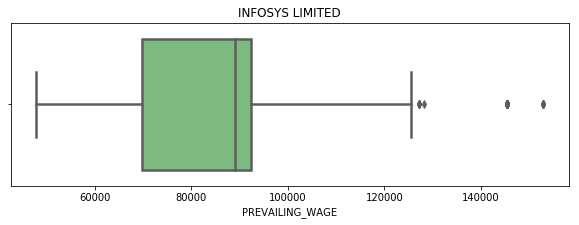

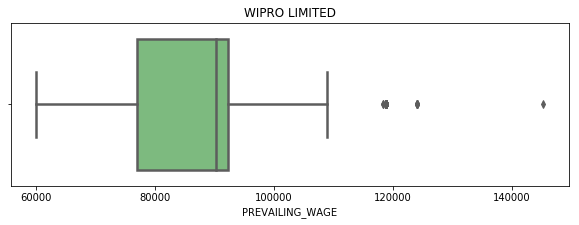

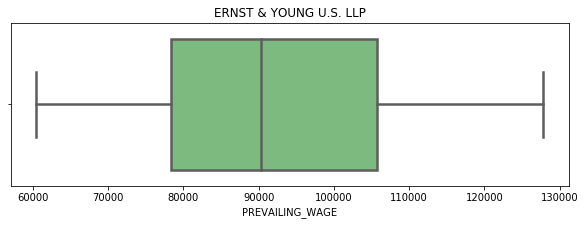

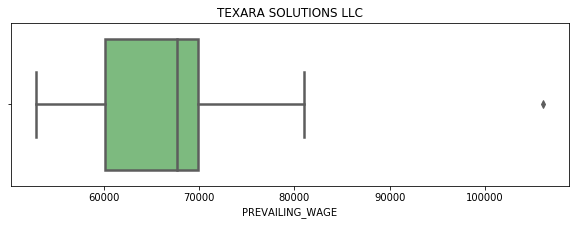

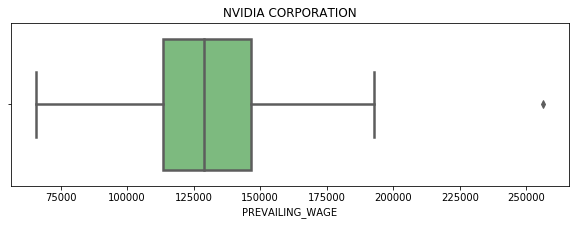

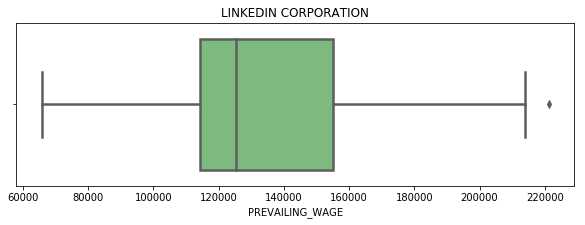

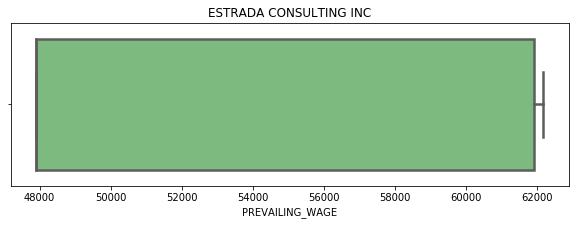

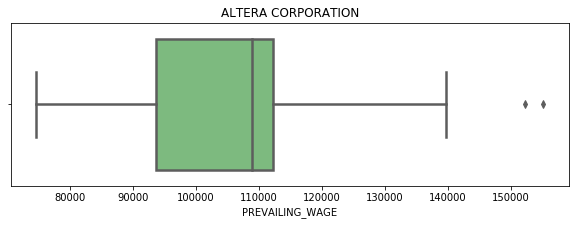

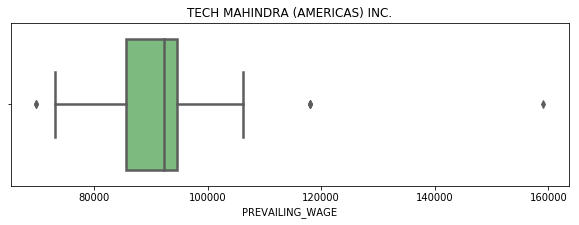

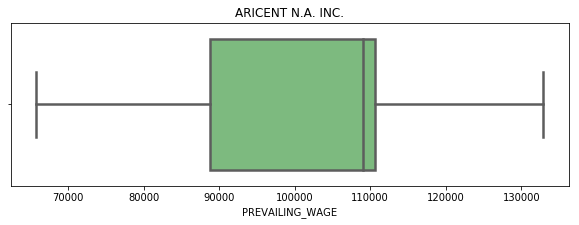

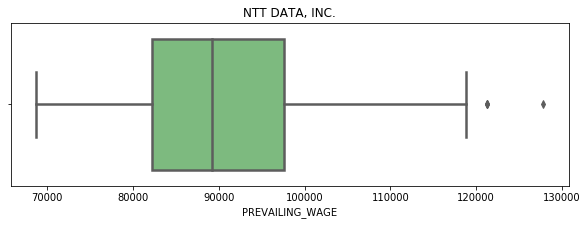

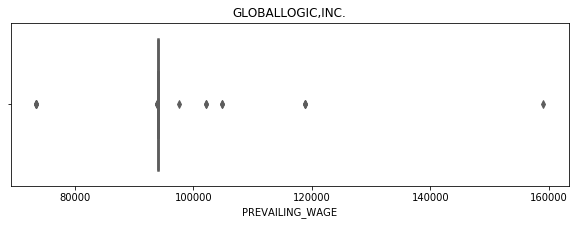

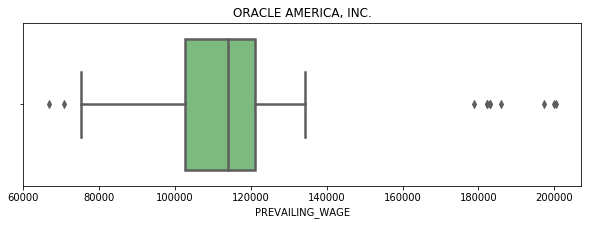

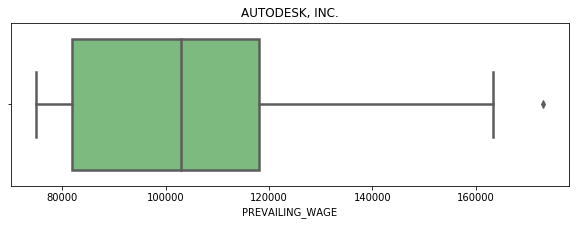

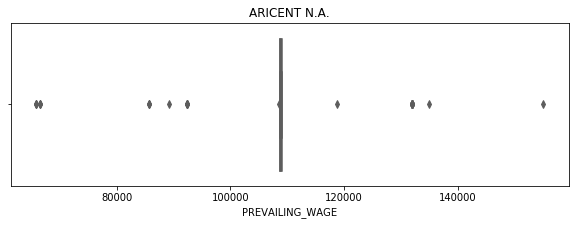

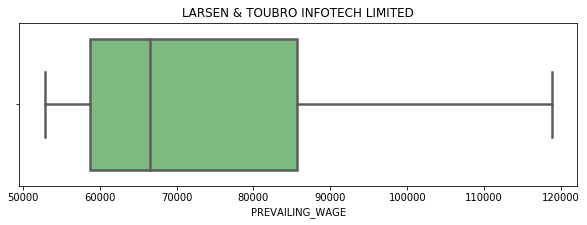

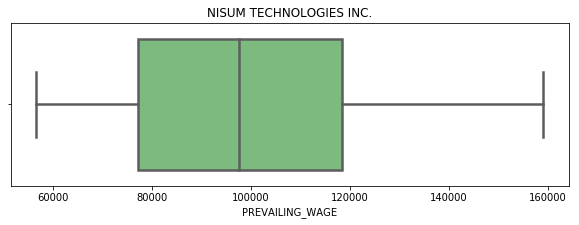

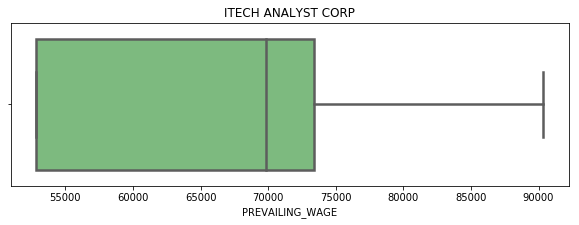

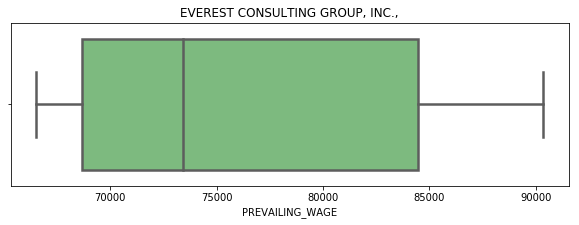

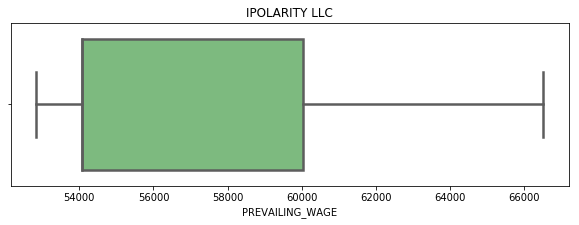

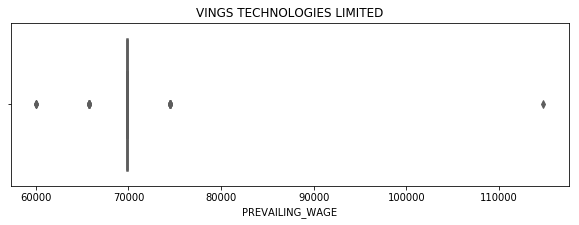

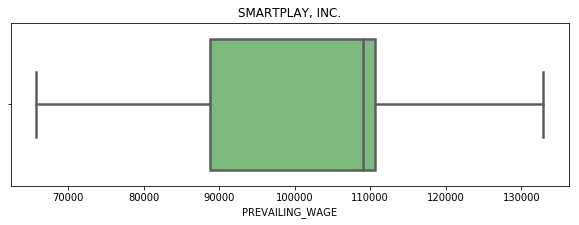

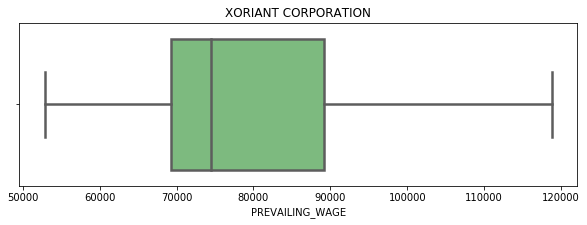

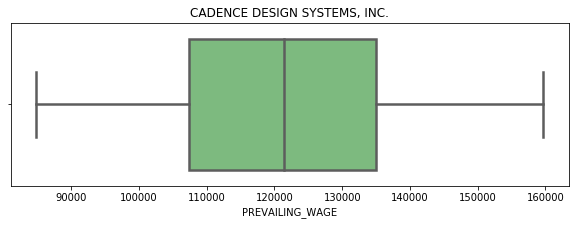

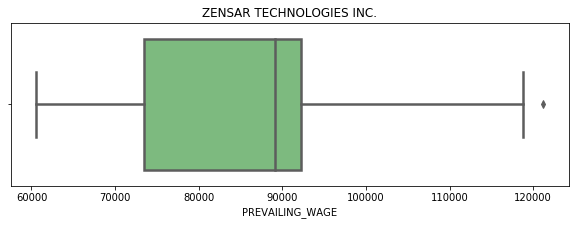

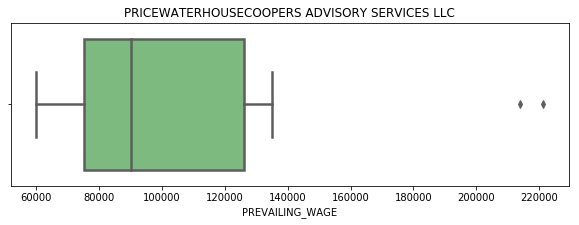

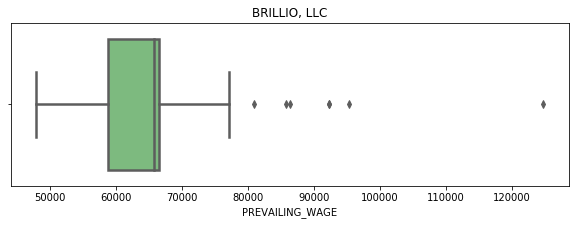

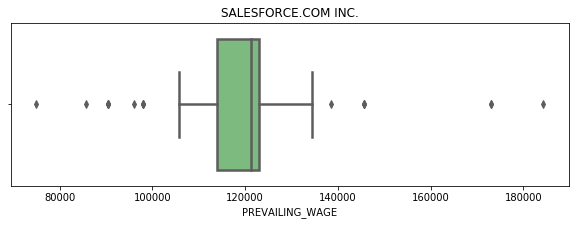

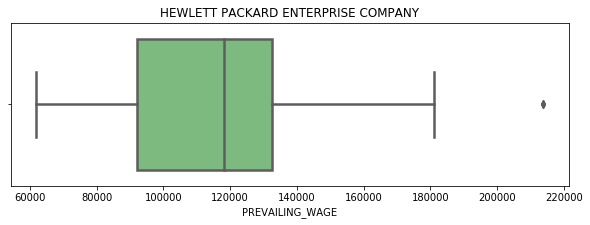

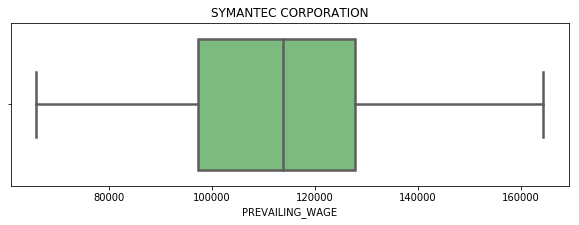

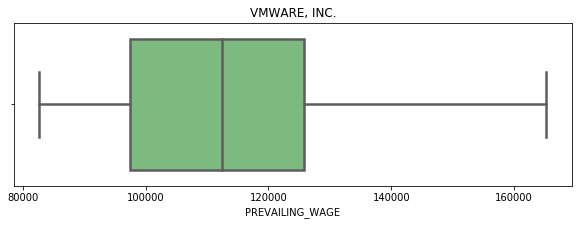

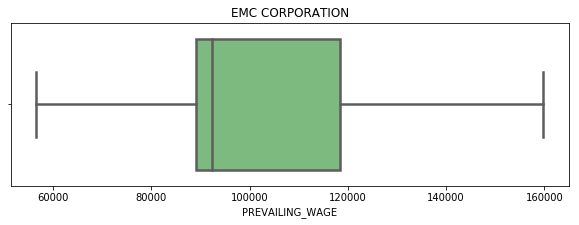

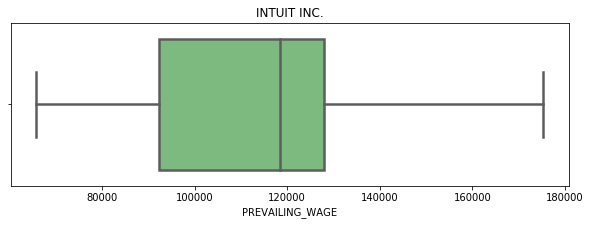

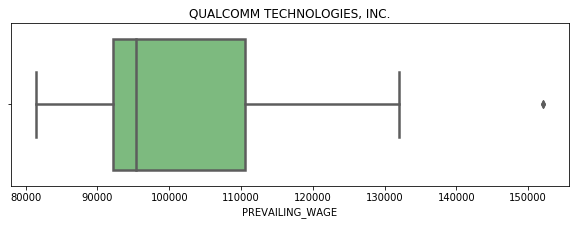

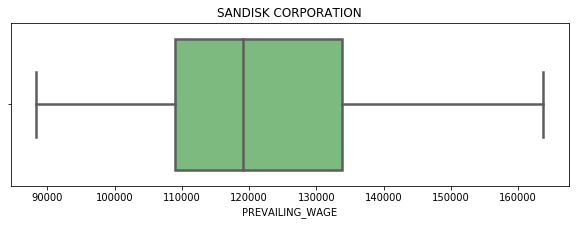

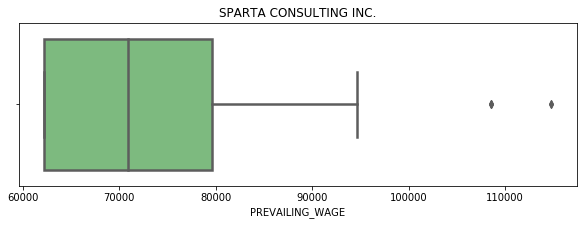

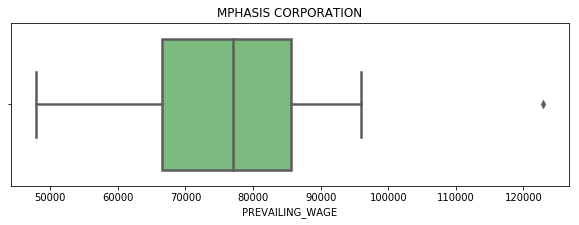

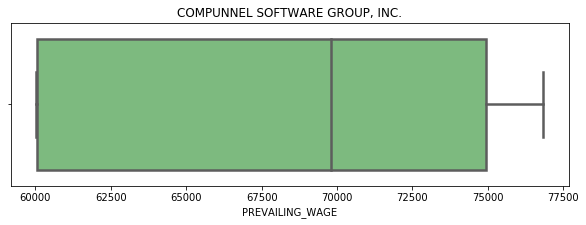

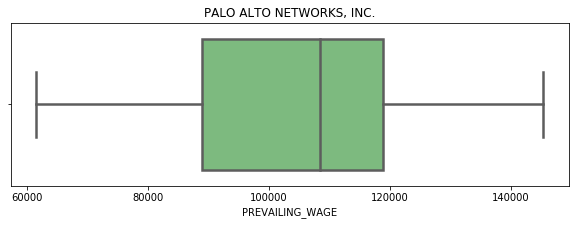

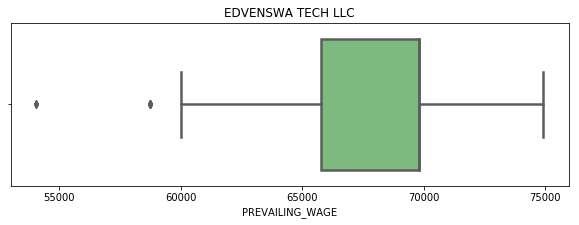

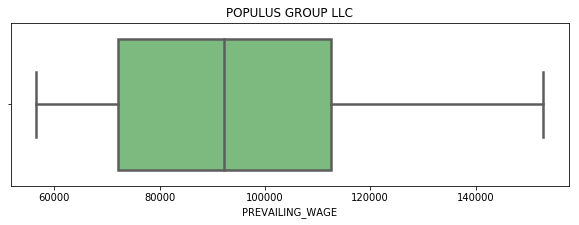

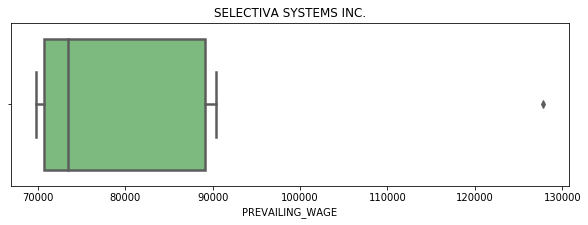

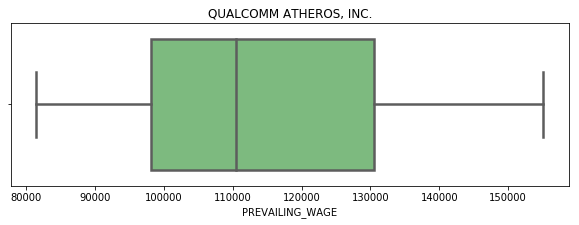

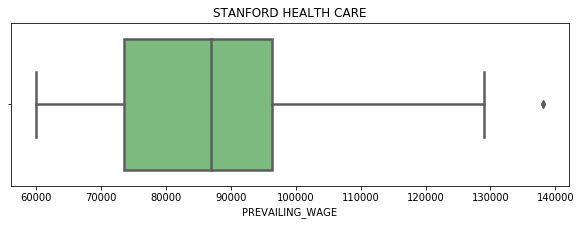

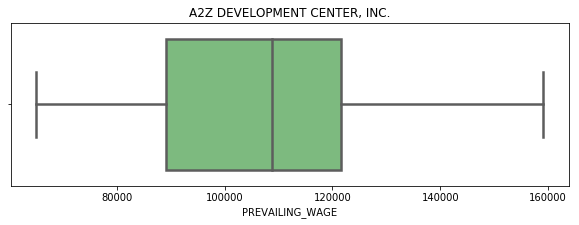

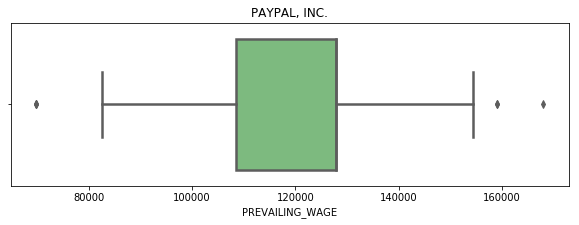

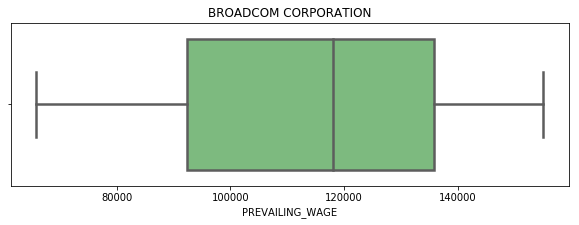

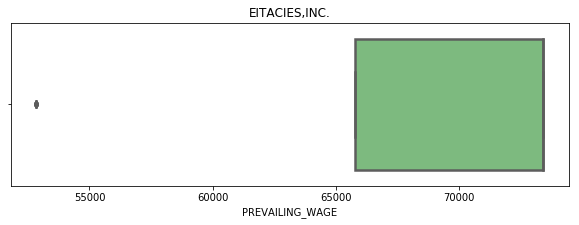

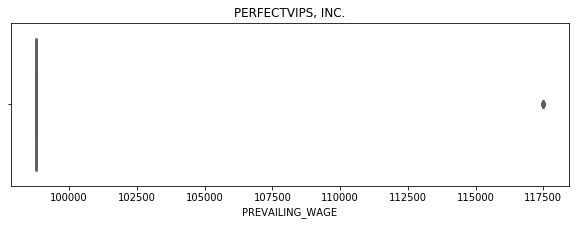

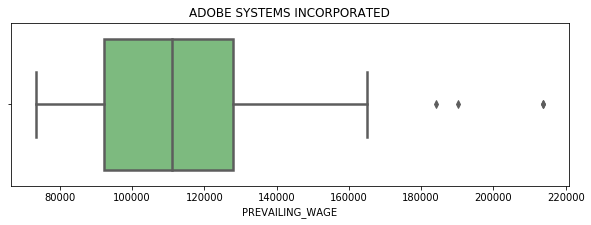

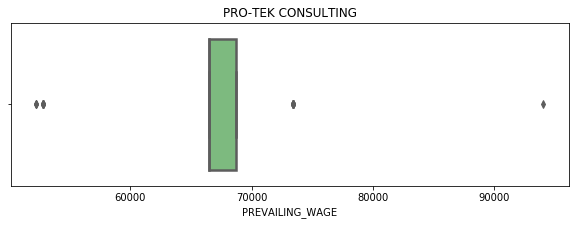

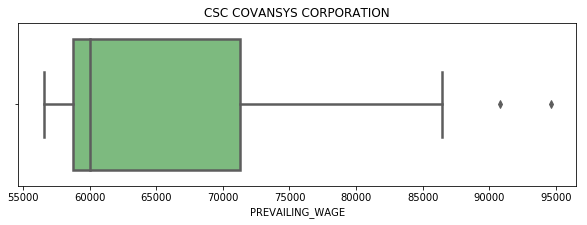

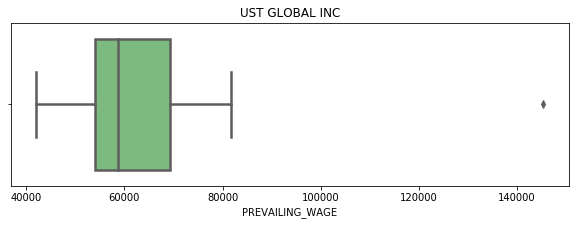

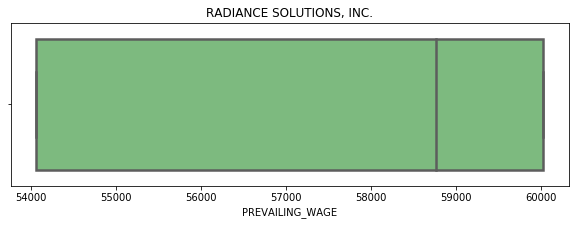

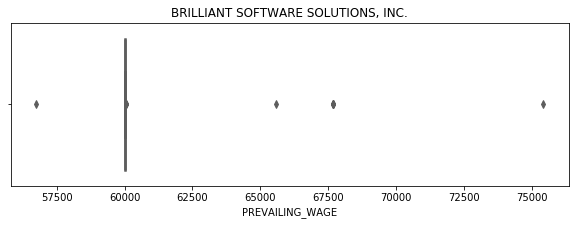

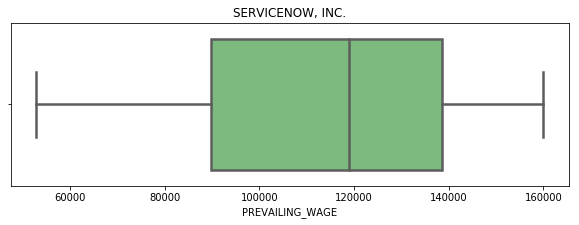

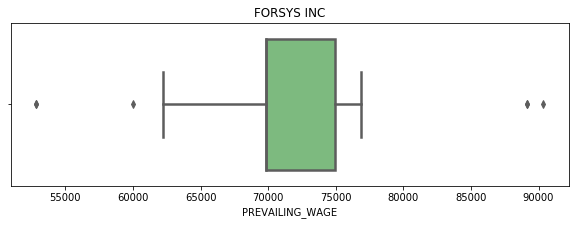

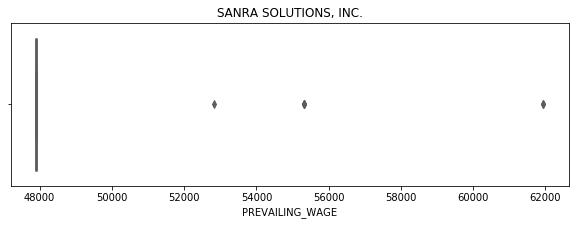

In [271]:
for company in list(more_1000):
    all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
    fig = plt.figure(figsize = (10, 3))
    ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
    ax.set_title(company)
    plt.show()

for company in list(between_99_and_50):
    all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
    fig = plt.figure(figsize = (10, 3))
    ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
    ax.set_title(company)
    plt.show()      
    
# for company in list(between_20_and_49):
#     all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
#     fig = plt.figure(figsize = (10, 3))
#     ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
#     ax.set_title(company)
#     plt.show()    